In [1]:
import xgboost as xgb
import pandas as pd
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
PROJECT_ROOT_DIR = "."
# Setting the route to save the model
MODEL_PATH = os.path.join(PROJECT_ROOT_DIR, "models")
os.makedirs(MODEL_PATH, exist_ok=True)

# 1. 使用 pickle 加载模型
with open('models/crust_thickness_xgboost_regression_model1.0.pkl', 'rb') as model_file:
    model = pickle.load(model_file)


In [2]:
from sklearn.model_selection import StratifiedShuffleSplit
def train_test_sp(data, target, test_size):
    """
    简单分层抽样
    based sklearn.model_selection.StratifiedShuffleSplit
    param data: data
    param target: the label 
    param test_size: float 0-1
    """
    splitned = StratifiedShuffleSplit(n_splits= 1, test_size = test_size, random_state = 2020)
    for train_index, test_index in splitned.split(data, data[target]):
        strat_train_set = data.loc[train_index]
        strat_test_set = data.loc[test_index]
    return  strat_train_set, strat_test_set

# Pretreatment (-1 without pretreatment)
from sklearn import preprocessing
def data_process(X,choice):
    if choice==0:
        X=preprocessing.RobustScaler().fit_transform(X)
    elif choice==1:
        X=preprocessing.MinMaxScaler().fit_transform(X)
    elif choice==2:
        X=preprocessing.StandardScaler().fit_transform(X)
    elif choice==3:
        X=preprocessing.PowerTransformer().fit_transform(X)
    elif choice==-1:
        X=X
    return X


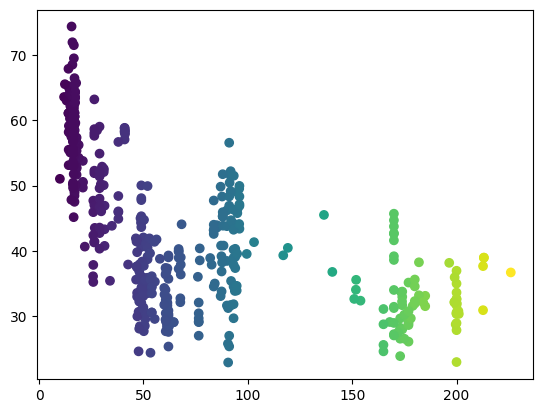

In [5]:
datao = pd.read_excel("datasets/Gangdese_Datasets.xlsx")
age = datao['Age']
data = datao.drop(['Data source', 'Lat', 'MnO', 'Long', 'sample', 'Age', 'Rb/Sr', 'La/Yb(n)'], axis=1)

#data.head()
#data2 = data.drop(['Year','CITATION','SAMPLE NAME','ROCK TYPE'], axis=1)
datast = pd.DataFrame(data_process(np.array(data), 3))
data_xgb_total = model.predict(datast)
data_xgb_total = pd.DataFrame(data_xgb_total)
datao['crust_thickness'] = data_xgb_total
datao.to_excel('outputs/Gangdese_application.xlsx') #save the results
plt.scatter(age, data_xgb_total, c=age)

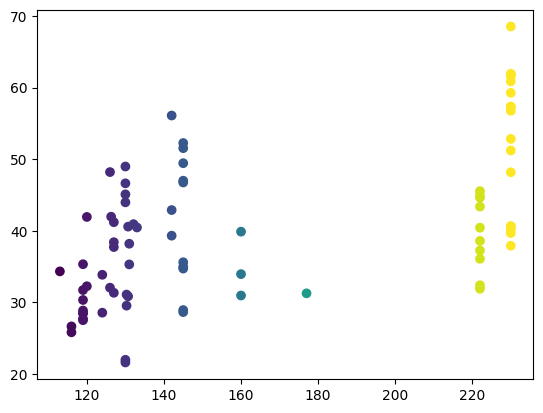

In [7]:
datao = pd.read_excel("datasets/Validation_NorthChinaCraton.xlsx")
age = datao['Age']
data = datao.drop(['Data source', 'Lat', 'MnO', 'Long', 'sample', 'Age', 'Rb/Sr', 'La/Yb(n)'], axis=1)

#data.head()
#data2 = data.drop(['Year','CITATION','SAMPLE NAME','ROCK TYPE'], axis=1)
datast = pd.DataFrame(data_process(np.array(data), 3))
data_xgb_total = model.predict(datast)
data_xgb_total = pd.DataFrame(data_xgb_total)
datao['crust_thickness'] = data_xgb_total
datao.to_excel('outputs/Validation_NorthChinaCraton_model1.xlsx') #save the results
plt.scatter(age, data_xgb_total, c=age)

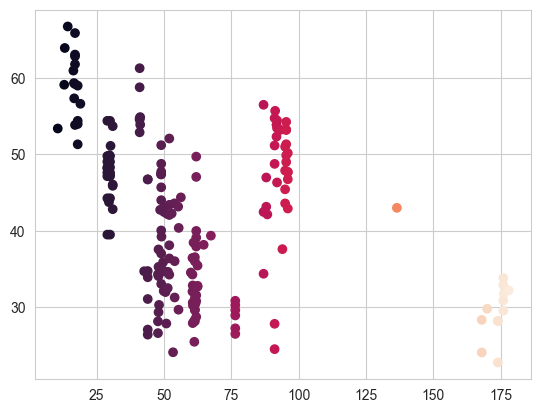

In [18]:
datao = pd.read_excel("sundell2021.xlsx")
age = datao['Age']
data  = datao.drop(['Data source',	'Lat','MnO',	'Long',	'sample',	'Age','Rb/Sr','La/Yb(n)'], axis = 1)

#data.head()
#data2 = data.drop(['Year','CITATION','SAMPLE NAME','ROCK TYPE'], axis=1)
datast = pd.DataFrame(data_process(np.array(data), 3))
data_xgb_total = model.predict(datast)
data_xgb_total = pd.DataFrame(data_xgb_total)
datao['crust_thickness'] = data_xgb_total
datao.to_excel('sundell2021_1025.xlsx') #save the results
plt.scatter(age, data_xgb_total, c=age)

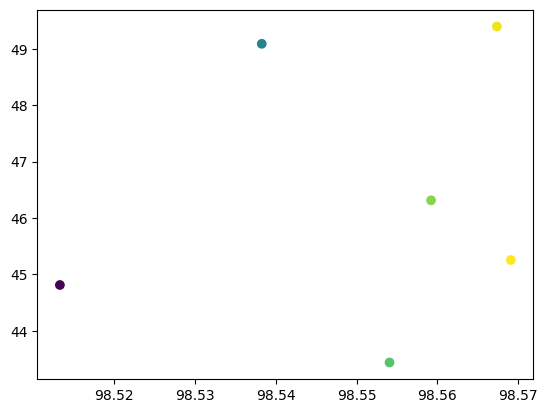

In [11]:
datao = pd.read_excel("datasets/Validation_Mexico.xlsx")
age = datao['Long']
data  = datao.drop(['Data source',	'Lat','MnO',	'Long',	'Sample',	'Age','Rb/Sr','La/Yb(n)'], axis = 1)

#data.head()
#data2 = data.drop(['Year','CITATION','SAMPLE NAME','ROCK TYPE'], axis=1)
datast = pd.DataFrame(data_process(np.array(data), 3))
data_xgb_total = model.predict(datast)
data_xgb_total = pd.DataFrame(data_xgb_total)
datao['crust_thickness'] = data_xgb_total
datao.to_excel('outputs/Validation_Mexico_model1.xlsx') #save the results
plt.scatter(age, data_xgb_total, c=age)